In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    
    """
    This function calculates mean_absolute_percentage_error
    
    Input:
        y_true (array): True values
        y_pred (array): Preicted values

    Returns: 
        Calculated MAPE 
    
    """
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
df = pd.read_excel('macrotrends_amazon.xlsx')
df.head()

,Quaterly,Revenue,Cost of Goods Sold,Gross Profit,Research and Development Expenses,SG&A Expenses,Other Operating Income or Expenses,Operating Expenses,Operating Income,Total Non-Operating Income/Expense,...,Income Taxes,Income After Taxes,Income from Continuous Operations,Net Income,EBITDA,EBIT,Basic Shares Outstanding,Shares Outstanding,Basic EPS,EPS
0,2021-09-30,110812,62930,47882,14380,28661,11.0,105960,4852,-537.0,...,1155,3160,3156,3156,13800,4852,507,515,6.23,6.12
1,2021-06-30,113080,64176,48904,13871,27320,-11.0,105378,7702,932.0,...,868,7766,7778,7778,15740,7702,505,514,15.40,15.12
2,2021-03-31,108518,62403,46115,12488,24724,-38.0,99653,8865,1403.0,...,2156,8112,8107,8107,16373,8865,504,513,16.09,15.79
3,2020-12-31,125555,79284,46271,12051,27844,497.0,118682,6873,892.0,...,566,7199,7222,7222,14491,6873,500,510,14.42,14.15
4,2020-09-30,96145,57106,39039,10976,21807,-62.0,89951,6194,615.0,...,569,6240,6331,6331,12717,6194,501,512,12.63,12.37


In [4]:
quater=pd.date_range('2005-03-31',periods=67,freq='Q')
df =df.set_index(quater[::-1])
df.head()

,Quaterly,Revenue,Cost of Goods Sold,Gross Profit,Research and Development Expenses,SG&A Expenses,Other Operating Income or Expenses,Operating Expenses,Operating Income,Total Non-Operating Income/Expense,...,Income Taxes,Income After Taxes,Income from Continuous Operations,Net Income,EBITDA,EBIT,Basic Shares Outstanding,Shares Outstanding,Basic EPS,EPS
2021-09-30,2021-09-30,110812,62930,47882,14380,28661,11.0,105960,4852,-537.0,...,1155,3160,3156,3156,13800,4852,507,515,6.23,6.12
2021-06-30,2021-06-30,113080,64176,48904,13871,27320,-11.0,105378,7702,932.0,...,868,7766,7778,7778,15740,7702,505,514,15.40,15.12
2021-03-31,2021-03-31,108518,62403,46115,12488,24724,-38.0,99653,8865,1403.0,...,2156,8112,8107,8107,16373,8865,504,513,16.09,15.79
2020-12-31,2020-12-31,125555,79284,46271,12051,27844,497.0,118682,6873,892.0,...,566,7199,7222,7222,14491,6873,500,510,14.42,14.15
2020-09-30,2020-09-30,96145,57106,39039,10976,21807,-62.0,89951,6194,615.0,...,569,6240,6331,6331,12717,6194,501,512,12.63,12.37


In [5]:
df=df.drop('Quaterly',axis=1)


In [6]:
plt.rcParams["ytick.color"]='white'
plt.rcParams["xtick.color"]='white'

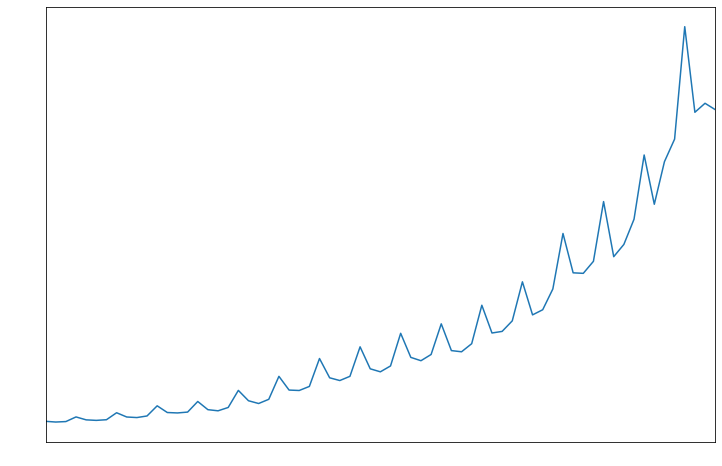

In [7]:
df['Cost of Goods Sold'].plot(figsize=(12,8))

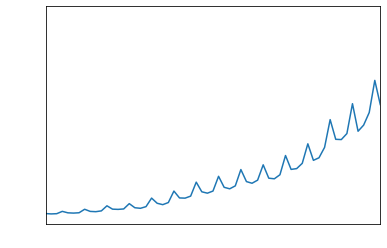

In [8]:
df['Cost of Goods Sold'].plot(xlim=['2005-01-01','2020-03-31'])

### Dropping data after 2020-03-31

In [9]:
new_df=df.iloc[6:]

In [10]:
df_rev=pd.DataFrame()
df_rev['Cost of Goods Sold']=new_df['Cost of Goods Sold'][::-1]
df_rev=df_rev.set_index(new_df.index[::-1])

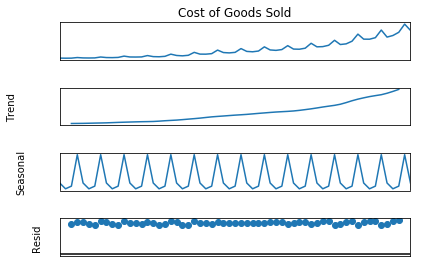

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_rev['Cost of Goods Sold'], model='mul')  # model='mul' also works
result.plot();

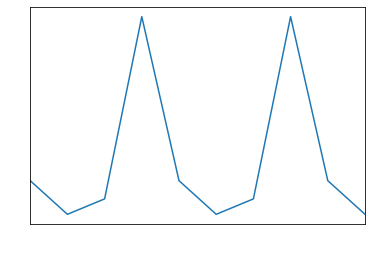

In [12]:
result.seasonal.iloc[0:10].plot()

### Holt Winter

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df_rev['DESadd4'] = ExponentialSmoothing(df_rev['Cost of Goods Sold'], trend='add').fit().fittedvalues.shift(-1)
df_rev.head()

C:\Users\aryan\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Cost of Goods Sold,DESadd4
2005-03-31,1444,1444.017452
2005-06-30,1303,1408.089043
2005-09-30,1395,1398.512807
2005-12-31,2309,1623.727676
2006-03-31,1732,1684.853978


[]

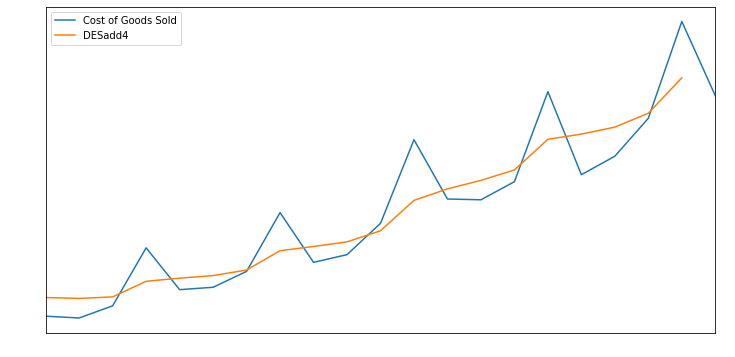

In [14]:
df_rev[['Cost of Goods Sold','DESadd4']].iloc[40:].plot(figsize=(12,6)).plot()

[]

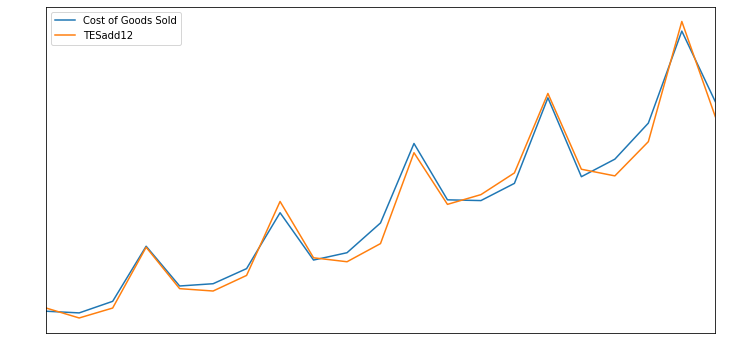

In [15]:
df_rev['TESadd12'] = ExponentialSmoothing(df_rev['Cost of Goods Sold'],trend='add',seasonal='mul',seasonal_periods=4).fit().fittedvalues
df_rev[['Cost of Goods Sold','TESadd12']].iloc[40:].plot(figsize=(12,6)).plot()

### Splitting Data

In [16]:
train_data = df_rev.iloc[:56]
test_data = df_rev.iloc[56:]

C:\Users\aryan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


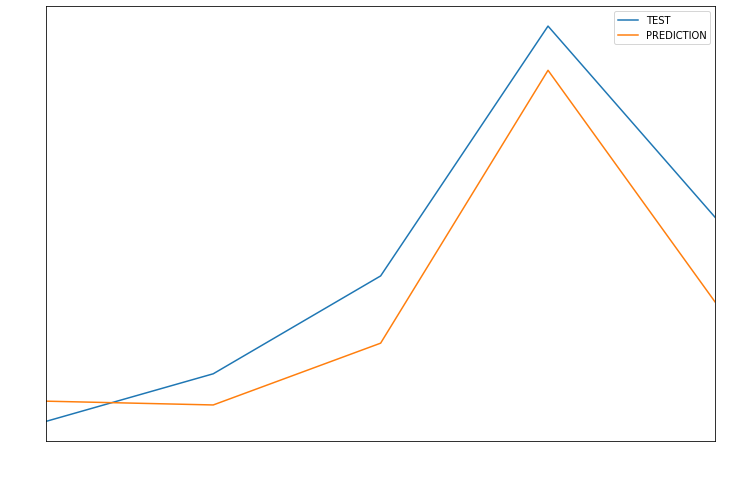

In [17]:
fitted_model1 = ExponentialSmoothing(train_data['Cost of Goods Sold'],trend='add',seasonal='mul',seasonal_periods=4).fit()
test_predictions = fitted_model1.forecast(5).rename('HW Forecast')
test_data['Cost of Goods Sold'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [18]:
mean_absolute_percentage_error(test_data['Cost of Goods Sold'], test_predictions)

5.902603857151412

#### Holt Winter Mape 5.9

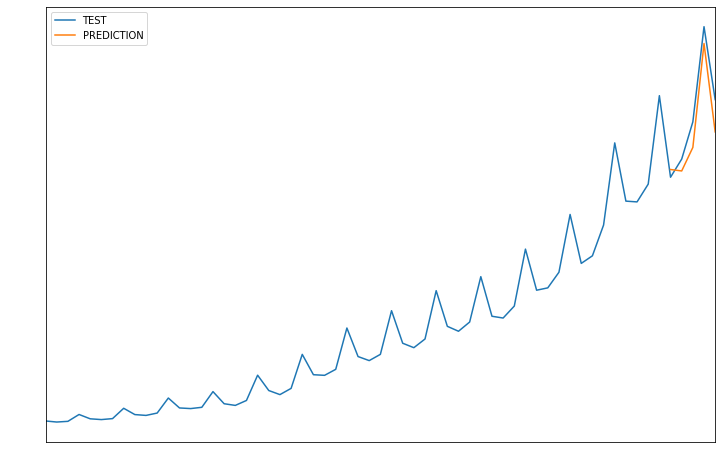

In [19]:
df_rev['Cost of Goods Sold'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [20]:
fitted_model1 = ExponentialSmoothing(df_rev['Cost of Goods Sold'],trend='add',seasonal='mul',seasonal_periods=4).fit()
test_predictions = fitted_model1.forecast(5).rename('HW Forecast')
mean_absolute_percentage_error(test_data['Cost of Goods Sold'], test_predictions)

C:\Users\aryan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


31.104280451116022

In [21]:
import warnings
warnings.filterwarnings("ignore")

### AR Model

In [22]:
from statsmodels.tsa.ar_model import AR,ARResults
start = len(train_data)
end = len(train_data)+len(test_data)-1
mape=[]
rename = f'AR(1) Predictions'
for i in range(1,13):
    model = AR(train_data['Cost of Goods Sold'])
    ARfit = model.fit(maxlag=i,method='cmle')
    #print(f'\nLag: {ARfit.k_ar}')
    #print(f'Coefficients:\n{ARfit.params}')
    predictions23 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)
    #print(mean_absolute_percentage_error(test_data[col],predictions23))
    mape.append([mean_absolute_percentage_error(test_data['Cost of Goods Sold'],predictions23),i])

In [23]:
min(mape)

[2.0274207846380046, 6]

In [24]:
model = AR(train_data['Cost of Goods Sold'])
ARfit = model.fit(maxlag=6,method='cmle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')
predictions23 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)
mean_absolute_percentage_error(test_data['Cost of Goods Sold'],predictions23)

Lag: 6
Coefficients:
const                    112.655393
L1.Cost of Goods Sold      1.269650
L2.Cost of Goods Sold     -0.601106
L3.Cost of Goods Sold     -0.010620
L4.Cost of Goods Sold      1.160961
L5.Cost of Goods Sold     -1.461955
L6.Cost of Goods Sold      0.713809
dtype: float64


2.0274207846380046

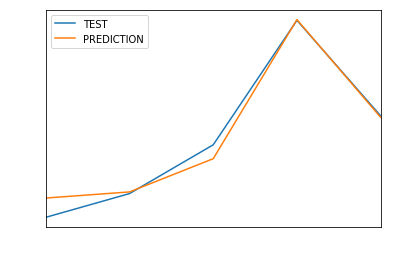

In [25]:
test_data['Cost of Goods Sold'].plot(legend=True,label='TEST')
predictions23.plot(legend=True,label='PREDICTION');

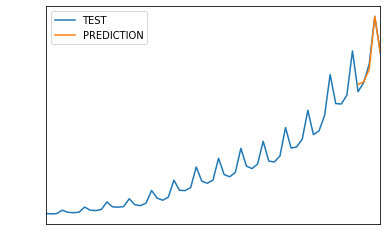

In [26]:
df_rev['Cost of Goods Sold'].plot(legend=True,label='TEST')
predictions23.plot(legend=True,label='PREDICTION');

AR(6) Model MAPE 2.02

### Stationarity

In [27]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [28]:
adf_test(train_data['Cost of Goods Sold'],title='')

Augmented Dickey-Fuller Test: 
ADF test statistic       1.722743
p-value                  0.998183
# lags used              7.000000
# observations          48.000000
critical value (1%)     -3.574589
critical value (5%)     -2.923954
critical value (10%)    -2.600039
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [29]:
diff = train_data['Cost of Goods Sold'].diff()

In [30]:
adf_test(diff,title='')

Augmented Dickey-Fuller Test: 
ADF test statistic       0.743946
p-value                  0.990675
# lags used              6.000000
# observations          48.000000
critical value (1%)     -3.574589
critical value (5%)     -2.923954
critical value (10%)    -2.600039
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


1

In [31]:
diff = diff.diff()

In [32]:
adf_test(diff,title='')

Augmented Dickey-Fuller Test: 
ADF test statistic     -5.890344e+00
p-value                 2.934532e-07
# lags used             5.000000e+00
# observations          4.800000e+01
critical value (1%)    -3.574589e+00
critical value (5%)    -2.923954e+00
critical value (10%)   -2.600039e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


2

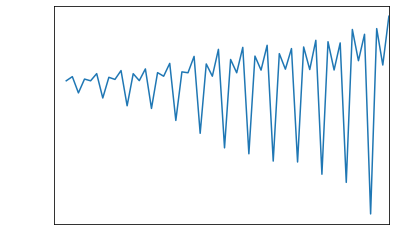

In [33]:
diff.plot()

In [34]:
from pmdarima import auto_arima
auto_arima(train_data['Cost of Goods Sold']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 2, 2)   Log Likelihood                -516.660
Date:                Tue, 15 Mar 2022   AIC                           1041.319
Time:                        16:51:58   BIC                           1049.275
Sample:                             0   HQIC                          1044.388
                                 - 56                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.029    -34.372      0.000      -1.057      -0.943
ma.L1         -0.0562      0.134     -0.419      0.676      -0.319       0.207
ma.L2         -0.8915      0.163     -5.466      0.000      -1.211      -0.572
sigma2      1.135e+07   3.28e-09   3.46e+15      0.000    1.13e+07    1.13e+07
===================================================================================
Ljung-Box (Q):                      337.72   Jarque-Bera (JB):                 2.30
Prob(Q):                              0.00   Prob(JB):                         0.32
Heteroskedasticity (H):              18.03   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.76e+31. Standard errors may be unstable.
"""

In [49]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

model = ARIMA(train_data['Cost of Goods Sold'],order=(1,2,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                               
=================================================================================
Dep. Variable:     D2.Cost of Goods Sold   No. Observations:                   54
Model:                    ARIMA(1, 2, 1)   Log Likelihood                -521.260
Method:                          css-mle   S.D. of innovations           3609.433
Date:                   Tue, 15 Mar 2022   AIC                           1050.521
Time:                           17:22:48   BIC                           1058.477
Sample:                       09-30-2005   HQIC                          1053.589
                            - 12-31-2018                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          38.5159     23.970      1.607      0.108      -8.465      85.496
ar.L1.D2.Cost of Goods Sold    -0.2983      0.139     -2.150      0.032      -0.570      -0.026
ma.L1.D2.Cost of Goods Sold    -1.0000      0.050    -19.908      0.000      -1.098      -0.902
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3519           +0.0000j            3.3519            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [50]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end).rename('ARIMA(2,2) Predictions')
mean_absolute_percentage_error(test_data['Cost of Goods Sold'],predictions)

105.99381479841222

In [44]:
from pmdarima import auto_arima
auto_arima(diff[2:]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -447.316
Date:                Tue, 15 Mar 2022   AIC                            904.632
Time:                        17:22:27   BIC                            914.577
Sample:                             0   HQIC                           908.467
                                 - 54                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9877      0.018    -55.021      0.000      -1.023      -0.953
ar.L2         -0.9848      0.015    -67.792      0.000      -1.013      -0.956
ar.L3         -0.9944      0.007   -147.154      0.000      -1.008      -0.981
ma.L1          0.1217      0.089      1.372      0.170      -0.052       0.296
sigma2      4.638e+05   5.67e+04      8.182      0.000    3.53e+05    5.75e+05
===================================================================================
Ljung-Box (Q):                       86.24   Jarque-Bera (JB):                11.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               8.68   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
model = ARMA(diff[2:],order=(2,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:     Cost of Goods Sold   No. Observations:                   54
Model:                     ARMA(2, 1)   Log Likelihood                -516.236
Method:                       css-mle   S.D. of innovations           3252.738
Date:                Tue, 15 Mar 2022   AIC                           1042.473
Time:                        17:25:47   BIC                           1052.418
Sample:                    09-30-2005   HQIC                          1046.308
                         - 12-31-2018                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       33.1772     15.187      2.185      0.029       3.412      62.943
ar.L1.Cost of Goods Sold    -0.4569      0.133     -3.423      0.001      -0.718      -0.195
ar.L2.Cost of Goods Sold    -0.4420      0.130     -3.389      0.001      -0.698      -0.186
ma.L1.Cost of Goods Sold    -1.0000      0.053    -18.910      0.000      -1.104      -0.896
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5168           -1.4126j            1.5041           -0.3058
AR.2           -0.5168           +1.4126j            1.5041            0.3058
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [66]:
start=len(train_data)-2
end=len(train_data)+len(test_data)-1-2
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

In [67]:
idx = pd.date_range('2019-03-31', periods=5, freq='Q')
pred = pd.DataFrame(predictions.to_list(),index=idx,columns=['Fcast'])
pred


,Fcast
2019-03-31,-15361.661328
2019-06-30,2921.042905
2019-09-30,5518.322780
2019-12-31,-3749.201223
2020-03-31,-663.230487


In [68]:
forecast = []

# Capture the two most recent values from the training set
v2,v1 = train_data['Cost of Goods Sold'].iloc[-2:]

# Apply the formula
for i in pred['Fcast']:
    newval = i + 2*v1 - v2
    forecast.append(newval)
    v2,v1 = v1,newval

pred['forecast']=forecast
pred

,Fcast,forecast
2019-03-31,-15361.661328,41207.338672
2019-06-30,2921.042905,40549.720249
2019-09-30,5518.322780,45410.424606
2019-12-31,-3749.201223,46521.927740
2020-03-31,-663.230487,46970.200388


In [69]:
mean_absolute_percentage_error(test_data['Cost of Goods Sold'], pred['forecast'])

12.593355698107702

In [71]:
from pmdarima import auto_arima
auto_arima(train_data['Cost of Goods Sold'],m=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   56
Model:             SARIMAX(3, 1, 0)x(1, 1, [1], 4)   Log Likelihood                -396.596
Date:                             Tue, 15 Mar 2022   AIC                            805.192
Time:                                     17:26:24   BIC                            816.783
Sample:                                          0   HQIC                           809.621
                                              - 56                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3155      0.121      2.608      0.009       0.078       0.553
ar.L2         -0.0908      0.186     -0.488      0.625      -0.455       0.274
ar.L3         -0.5117      0.175     -2.931      0.003      -0.854      -0.170
ar.S.L4        0.9992      0.009    116.131      0.000       0.982       1.016
ma.S.L4       -0.9540      0.263     -3.625      0.000      -1.470      -0.438
sigma2      2.833e+05   9.66e-07   2.93e+11      0.000    2.83e+05    2.83e+05
===================================================================================
Ljung-Box (Q):                       20.13   Jarque-Bera (JB):                 7.80
Prob(Q):                              1.00   Prob(JB):                         0.02
Heteroskedasticity (H):               8.26   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.34e+26. Standard errors may be unstable.
"""

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data['Cost of Goods Sold'],order=(3,1,0),seasonal_order=(1,1,[1],4))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                  Cost of Goods Sold   No. Observations:                   56
Model:             SARIMAX(3, 1, 0)x(1, 1, [1], 4)   Log Likelihood                -396.596
Date:                             Tue, 15 Mar 2022   AIC                            805.192
Time:                                     17:27:13   BIC                            816.783
Sample:                                 03-31-2005   HQIC                           809.621
                                      - 12-31-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3155      0.121      2.608      0.009       0.078       0.553
ar.L2         -0.0908      0.186     -0.488      0.625      -0.455       0.274
ar.L3         -0.5117      0.175     -2.931      0.003      -0.854      -0.170
ar.S.L4        0.9992      0.009    116.131      0.000       0.982       1.016
ma.S.L4       -0.9540      0.263     -3.625      0.000      -1.470      -0.438
sigma2      2.833e+05   9.66e-07   2.93e+11      0.000    2.83e+05    2.83e+05
===================================================================================
Ljung-Box (Q):                       20.13   Jarque-Bera (JB):                 7.80
Prob(Q):                              1.00   Prob(JB):                         0.02
Heteroskedasticity (H):               8.26   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.34e+26. Standard errors may be unstable.
"""

In [74]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end).rename('ARIMA(2,2) Predictions')
mean_absolute_percentage_error(test_data['Cost of Goods Sold'],predictions)

3.5199005717219607

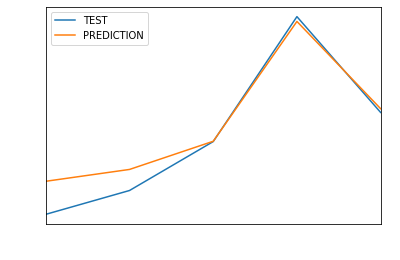

In [75]:
test_data['Cost of Goods Sold'].plot(legend=True,label='TEST')
predictions.plot(legend=True,label='PREDICTION');

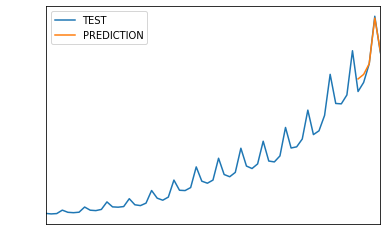

In [76]:
df_rev['Cost of Goods Sold'].plot(legend=True,label='TEST')
predictions.plot(legend=True,label='PREDICTION');

In [77]:
from prophet import Prophet
df_rev_fb=pd.DataFrame()


df_rev_fb['y']=new_df['Cost of Goods Sold'][::-1]
df_rev_fb['ds']=new_df.index[::-1]

In [78]:
train_data_fb = df_rev_fb.iloc[:56]
test_data_fb = df_rev_fb.iloc[56:]

In [79]:
m = Prophet()
m.fit(train_data_fb)

future = m.make_future_dataframe(periods=5,freq = 'Q')
forecast = m.predict(future)
forecast.tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
56,2019-03-31,-28487.765776,33701.467748,37717.165771,-28498.668739,-28476.225449,64239.326231,64239.326231,64239.326231,64239.326231,64239.326231,64239.326231,0.0,0.0,0.0,35751.560454
57,2019-06-30,-27267.189893,34047.752618,37983.387217,-27320.399249,-27213.987149,63329.111690,63329.111690,63329.111690,63329.111690,63329.111690,63329.111690,0.0,0.0,0.0,36061.921797
58,2019-09-30,-26033.201088,35595.647851,39594.604613,-26150.556171,-25919.725235,63665.440407,63665.440407,63665.440407,63665.440407,63665.440407,63665.440407,0.0,0.0,0.0,37632.239319
59,2019-12-31,-24799.212283,41272.401055,45451.234673,-24975.658776,-24621.579555,68274.647907,68274.647907,68274.647907,68274.647907,68274.647907,68274.647907,0.0,0.0,0.0,43475.435623
60,2020-03-31,-23578.636400,37769.763927,42118.540616,-23822.258997,-23307.332528,63531.317627,63531.317627,63531.317627,63531.317627,63531.317627,63531.317627,0.0,0.0,0.0,39952.681227


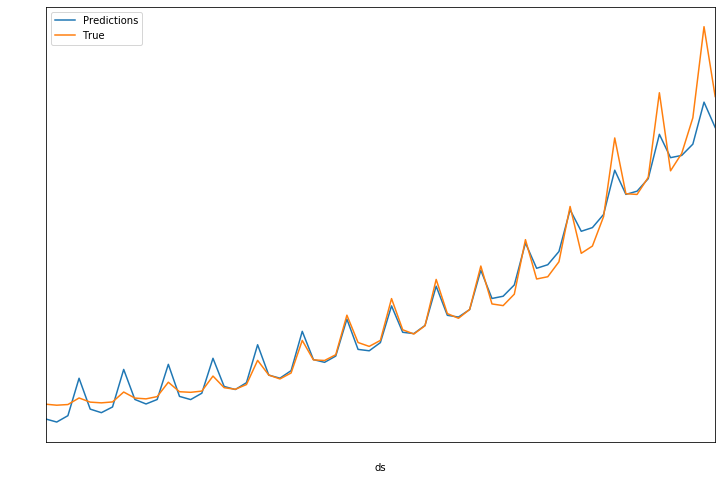

In [80]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

df_rev_fb.plot(x='ds',y='y',label='True',legend=True,ax=ax)

In [81]:
pred=forecast[-5:]['yhat']
mean_absolute_percentage_error(test_data_fb['y'],pred)

8.844643914594892

### Final Model

In [83]:
start=len(df_rev)
end=len(df_rev)-1+5


model = AR(df_rev['Cost of Goods Sold'])
ARfit = model.fit(maxlag=6,method='cmle')
predictions23 = ARfit.predict(start=start,end=end,dynamic=False)

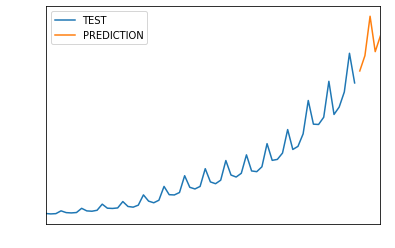

In [84]:
df_rev['Cost of Goods Sold'].plot(legend=True,label='TEST')
predictions23.plot(legend=True,label='PREDICTION');

In [85]:
import pickle

pickle.dump(ARfit, open('model_COGS.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model_COGS.pkl','rb'))
print(model.predict(start=len(df_rev),end=len(df_rev)+5))

2020-06-30    48180.854083
2020-09-30    53201.189500
2020-12-31    66123.915806
2021-03-31    54518.218251
2021-06-30    59657.798219
2021-09-30    65594.117948
Freq: Q-DEC, dtype: float64
